Program 1: Implement a simple neural network from scratch.
i.Implement a perceptron.
ii. Train the perceptron on a simple dataset (e.g., AND, OR logic gates).
iii. Visualize the decision boundary.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.1448, Accuracy: 1.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


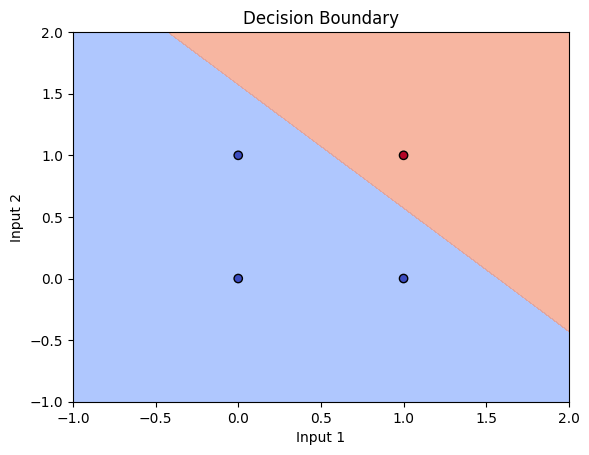

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create a dataset for the AND logic gate
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
labels = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Build the perceptron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(data, labels, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(data, labels, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Visualize the decision boundary
def plot_decision_boundary(model, data, labels):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.7, levels=[0, 0.5, 1], cmap="coolwarm")
    plt.scatter(data[:, 0], data[:, 1], c=labels[:, 0], edgecolors='k', cmap="coolwarm")
    plt.title("Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(model, data, labels)
